In [1]:
# https://www.tensorflow.org/tutorials/load_data/images



# the data using tf.keras.preprocessing

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

# AUTOTUNE = tf.data.experimental.AUTOTUNE



In [4]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [32]:
import glob

In [2]:
tf.__version__

'2.0.0'

# downloading the images to local storage

In [7]:
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)

data_dir = pathlib.Path(data_dir)


# they are downloaded in homedir/.keras/datasets/flower_photos

In [7]:
data_dir

PosixPath('/Users/j/.keras/datasets/flower_photos')

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

# setting the classnames

In [9]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['roses', 'sunflowers', 'daisy', 'dandelion', 'tulips'],
      dtype='<U10')

In [11]:
for item in data_dir.glob('*'):
    print(item)

/Users/j/.keras/datasets/flower_photos/roses
/Users/j/.keras/datasets/flower_photos/sunflowers
/Users/j/.keras/datasets/flower_photos/daisy
/Users/j/.keras/datasets/flower_photos/dandelion
/Users/j/.keras/datasets/flower_photos/tulips
/Users/j/.keras/datasets/flower_photos/LICENSE.txt


# Displaying the images

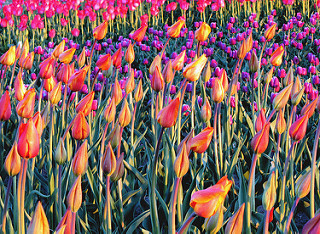

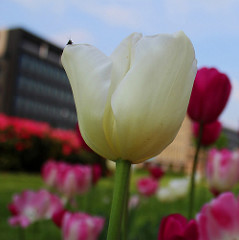

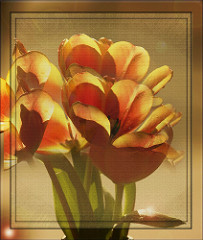

In [13]:
roses = list(data_dir.glob('tulips/*'))

for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))


# loading the data using tf.keras.preprocessing


In [14]:
# The 1./255 is to convert from uint8 to float32 in range [0,1]. Better for d\feeding to a neural net
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [29]:
BATCH_SIZE = 32
#  Batch Sixe is how many images are we feeding in on one batch. It can be set to none. It is important to set it
# to optimise computing power
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [23]:
print(data_dir)
print()
!ls /Users/j/.keras/datasets/flower_photos
print()
print(list(CLASS_NAMES))

/Users/j/.keras/datasets/flower_photos

LICENSE.txt daisy       dandelion   roses       sunflowers  tulips

['roses', 'sunflowers', 'daisy', 'dandelion', 'tulips']


In [24]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 3670 images belonging to 5 classes.


# inspecting a batch

In [27]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

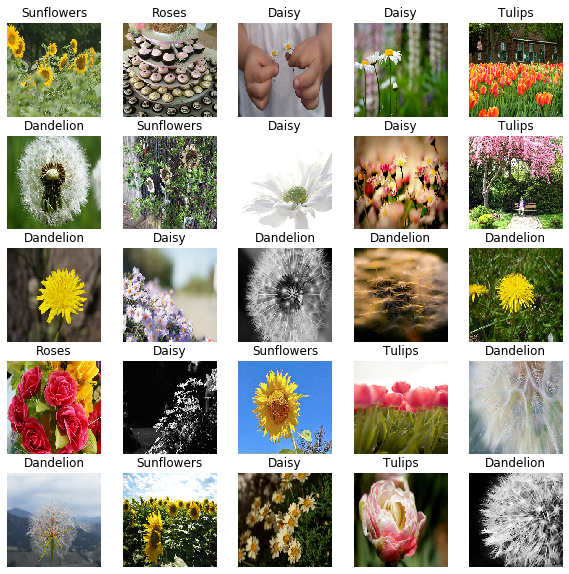

In [28]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

# Load using tf.data.Dataset 

more prefered because:


It's slow. See the performance section below.

It lacks fine-grained control.

It is not well integrated with the rest of TensorFlow.